# Support Vector Machines
Optimal Decision Boundaries(一般來說，我們希望我們的決策邊界盡可能遠離訓練點)

Predictions for new points: [0. 1.]


/var/folders/lk/5d382g6x3b99js21l7hhvyzw0000gn/T/ipykernel_44051/1713696376.py:42: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black', linestyles='--', label='Decision Boundary')


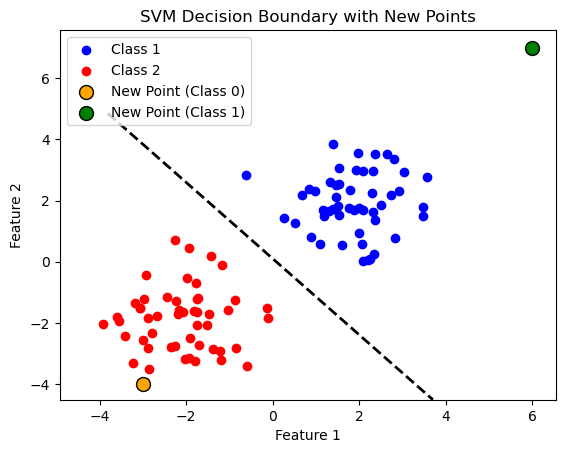

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# 生成資料 (跟前面例子一致)
np.random.seed(42)
class_1_points = np.random.randn(50, 2) + [2, 2]
class_1_labels = np.ones(50)
class_2_points = np.random.randn(50, 2) + [-2, -2]
class_2_labels = np.zeros(50)

points = np.vstack((class_1_points, class_2_points))
labels = np.hstack((class_1_labels, class_2_labels))

# 訓練 SVM
classifier = SVC(kernel='linear', probability=True)
classifier.fit(points, labels)

# 新資料點
new_points = np.array([[-3, -4], [6, 7]])
predictions = classifier.predict(new_points)
print("Predictions for new points:", predictions)

# 繪圖
def plot_svm_with_new_points(points, labels, model, new_points, predictions):
    # 繪製原始資料
    plt.scatter(points[labels == 1, 0], points[labels == 1, 1], color='b', label='Class 1')
    plt.scatter(points[labels == 0, 0], points[labels == 0, 1], color='r', label='Class 2')

    # 繪製新資料點
    for point, prediction in zip(new_points, predictions):
        plt.scatter(point[0], point[1], color='g' if prediction == 1 else 'orange', 
                    s=100, edgecolor='k', label=f"New Point (Class {int(prediction)})")

    # 繪製 SVM 決策邊界
    x_min, x_max = points[:, 0].min() - 1, points[:, 0].max() + 1
    y_min, y_max = points[:, 1].min() - 1, points[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black', linestyles='--', label='Decision Boundary')
    plt.legend()
    plt.title("SVM Decision Boundary with New Points")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_svm_with_new_points(points, labels, classifier, new_points, predictions)


# Kernels

Validation Accuracy: 1.0


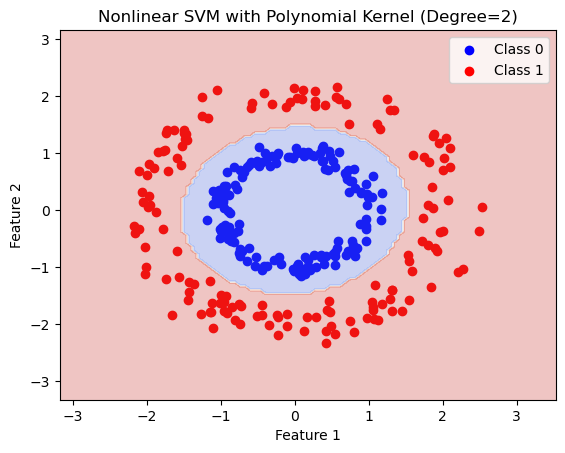

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# 生成資料：兩個同心圓
np.random.seed(42)
n_samples = 300

# 內圈
inner_circle = np.random.randn(n_samples // 2, 2) * 0.5
inner_circle_radius = np.sqrt(inner_circle[:, 0]**2 + inner_circle[:, 1]**2)
inner_circle = inner_circle / inner_circle_radius[:, np.newaxis]
inner_circle *= 1 + 0.1 * np.random.randn(inner_circle.shape[0], 1)

# 外圈
outer_circle = np.random.randn(n_samples // 2, 2)
outer_circle_radius = np.sqrt(outer_circle[:, 0]**2 + outer_circle[:, 1]**2)
outer_circle = outer_circle / outer_circle_radius[:, np.newaxis]
outer_circle *= 2 + 0.2 * np.random.randn(outer_circle.shape[0], 1)

# 標籤：內圈為 0，外圈為 1
points = np.vstack([inner_circle, outer_circle])
labels = np.hstack([np.zeros(n_samples // 2), np.ones(n_samples // 2)])

# 資料切分
training_data, validation_data, training_labels, validation_labels = train_test_split(
    points, labels, train_size=0.8, test_size=0.2, random_state=100
)

# 訓練 SVM
classifier = SVC(kernel='poly', degree=2)
classifier.fit(training_data, training_labels)

# 評估
score = classifier.score(validation_data, validation_labels)
print(f"Validation Accuracy: {score}")

# 繪圖
def plot_data_and_decision_boundary(points, labels, model):
    plt.scatter(points[labels == 0, 0], points[labels == 0, 1], color='b', label='Class 0')
    plt.scatter(points[labels == 1, 0], points[labels == 1, 1], color='r', label='Class 1')

    # 繪製決策邊界
    x_min, x_max = points[:, 0].min() - 1, points[:, 0].max() + 1
    y_min, y_max = points[:, 1].min() - 1, points[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.legend()
    plt.title("Nonlinear SVM with Polynomial Kernel (Degree=2)")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_data_and_decision_boundary(points, labels, classifier)


# Radial Basis Function Kernel

Gamma: 0.01, Validation Accuracy: 0.8166666666666667


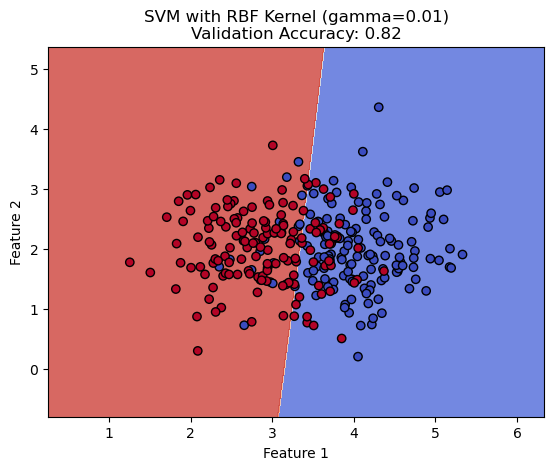

Gamma: 0.1, Validation Accuracy: 0.8333333333333334


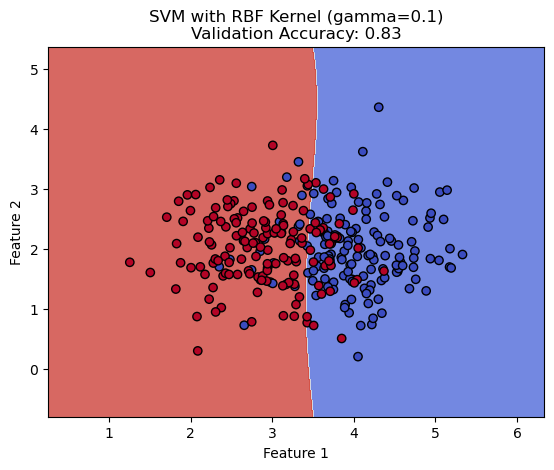

Gamma: 1, Validation Accuracy: 0.8333333333333334


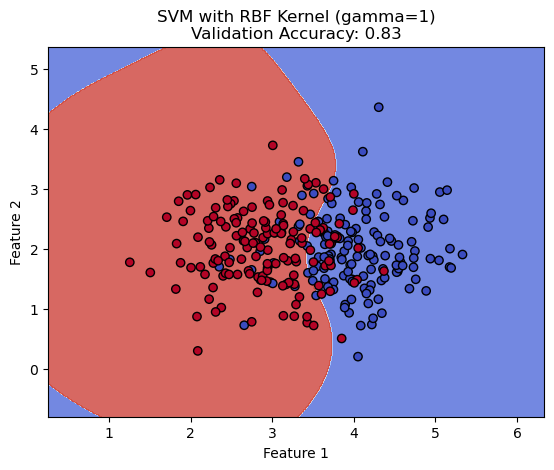

Gamma: 10, Validation Accuracy: 0.8166666666666667


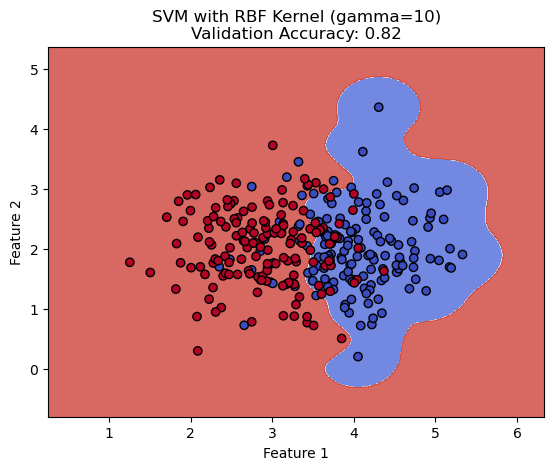

Gamma: 100, Validation Accuracy: 0.7166666666666667


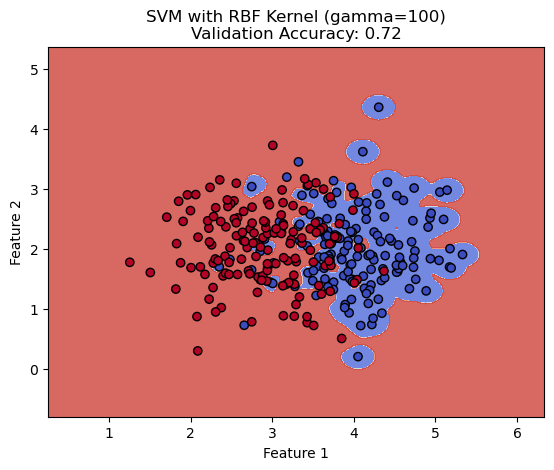

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# 生成兩類資料
n_samples = 300
# 第一類資料 (亂數生成)
class_0 = np.random.randn(n_samples // 2, 2) * 0.6 + np.array([4, 2])
# 第二類資料 (亂數生成
class_1 = np.random.randn(n_samples // 2, 2) * 0.6 + np.array([3, 2])

# 標籤
points = np.vstack([class_0, class_1])
labels = np.hstack([np.zeros(n_samples // 2), np.ones(n_samples // 2)])

# 資料切分
training_data, validation_data, training_labels, validation_labels = train_test_split(
    points, labels, train_size=0.8, test_size=0.2, random_state=100
)

# 測試不同 gamma 值並繪圖
def plot_decision_boundary_and_points(gamma):
    classifier = SVC(kernel="rbf", gamma=gamma)
    classifier.fit(training_data, training_labels)
    
    # 驗證準確率
    score = classifier.score(validation_data, validation_labels)
    print(f"Gamma: {gamma}, Validation Accuracy: {score}")
    
    # 設定繪圖網格
    x_min, x_max = points[:, 0].min() - 1, points[:, 0].max() + 1
    y_min, y_max = points[:, 1].min() - 1, points[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 500),
        np.linspace(y_min, y_max, 500)
    )
    
    # 預測網格點
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # 繪製分類邊界
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    
    # 繪製資料點
    plt.scatter(points[:, 0], points[:, 1], c=labels, edgecolors="k", cmap=plt.cm.coolwarm)
    plt.title(f"SVM with RBF Kernel (gamma={gamma})\nValidation Accuracy: {score:.2f}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# 測試不同的 gamma 值
gamma_values = [0.01, 0.1, 1, 10, 100]
for gamma in gamma_values:
    plot_decision_boundary_and_points(gamma)
